In [13]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

from keras.datasets import mnist
import keras as kb

from sklearn.preprocessing import LabelBinarizer


from plotnine import *

from sklearn.metrics import mean_squared_error, mean_absolute_error, roc_auc_score

from sklearn.linear_model import LinearRegression # Linear Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables

from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.model_selection import KFold # k-fold cv
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, ConfusionMatrixDisplay, roc_auc_score, recall_score, precision_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from keras import regularizers
from tensorflow.keras.layers import Dropout

In [14]:
#Reading in data and dropping any null values
df=pd.read_csv('apple_quality 3.csv')
df.dropna()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good
...,...,...,...,...,...,...,...,...,...
3995,3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,bad
3996,3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,good
3997,3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,bad
3998,3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,good


In [15]:
#Swapping quality to a binary 0 and 1 as opposed to good and bad
df['Quality'].replace('good',1,inplace=True)
df['Quality'].replace('bad',0,inplace=True)
#Also dropping the id since I didn't want
df.drop('A_id', axis=1, inplace=True)
df.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1


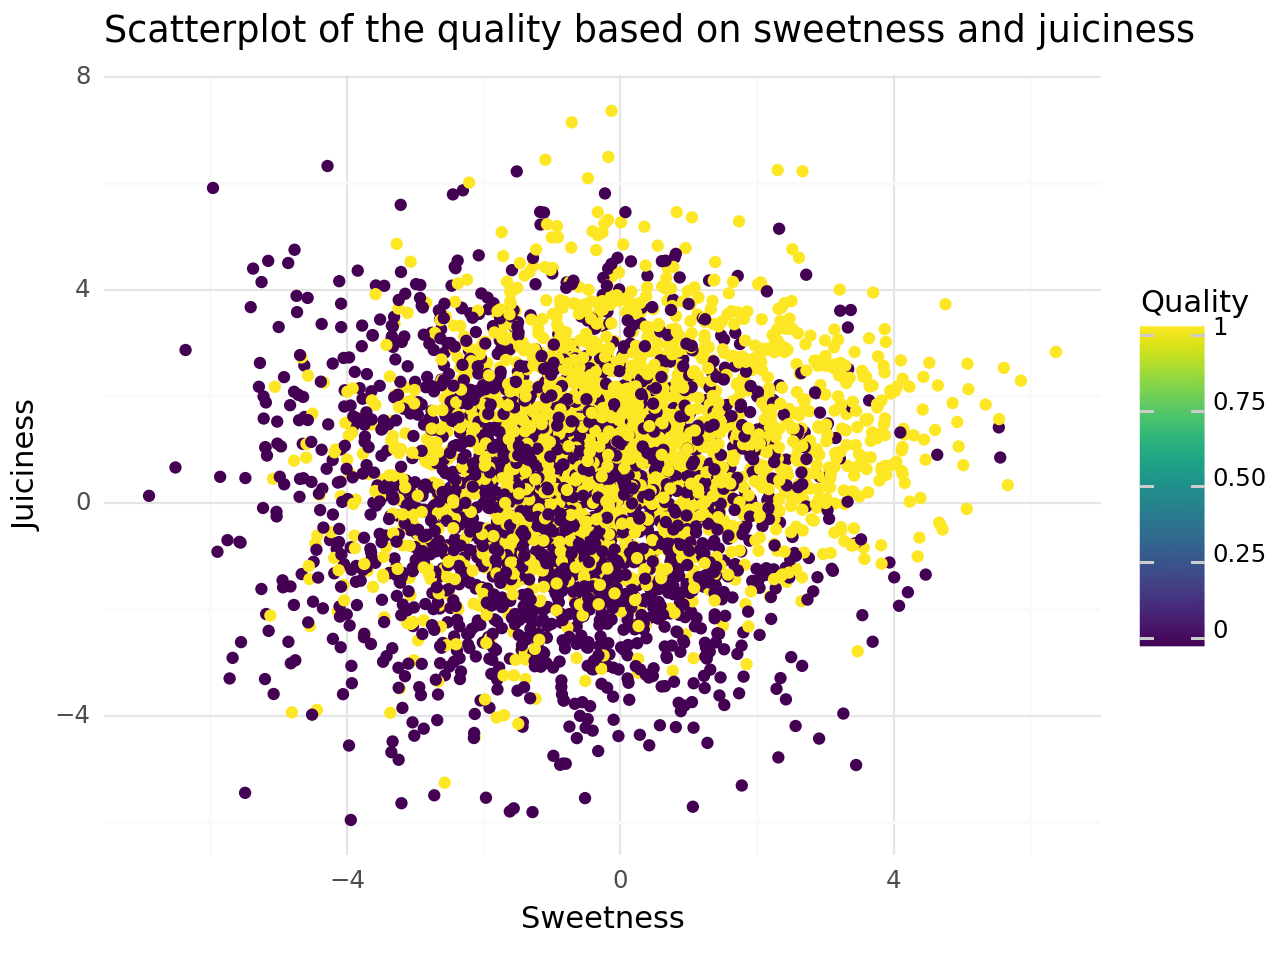

<Figure Size: (640 x 480)>

In [16]:
ggplot(df, aes(x = 'Sweetness', y = 'Juiciness', color = 'Quality'))+geom_point()+theme_minimal()+ggtitle("Scatterplot of the quality based on sweetness and juiciness")

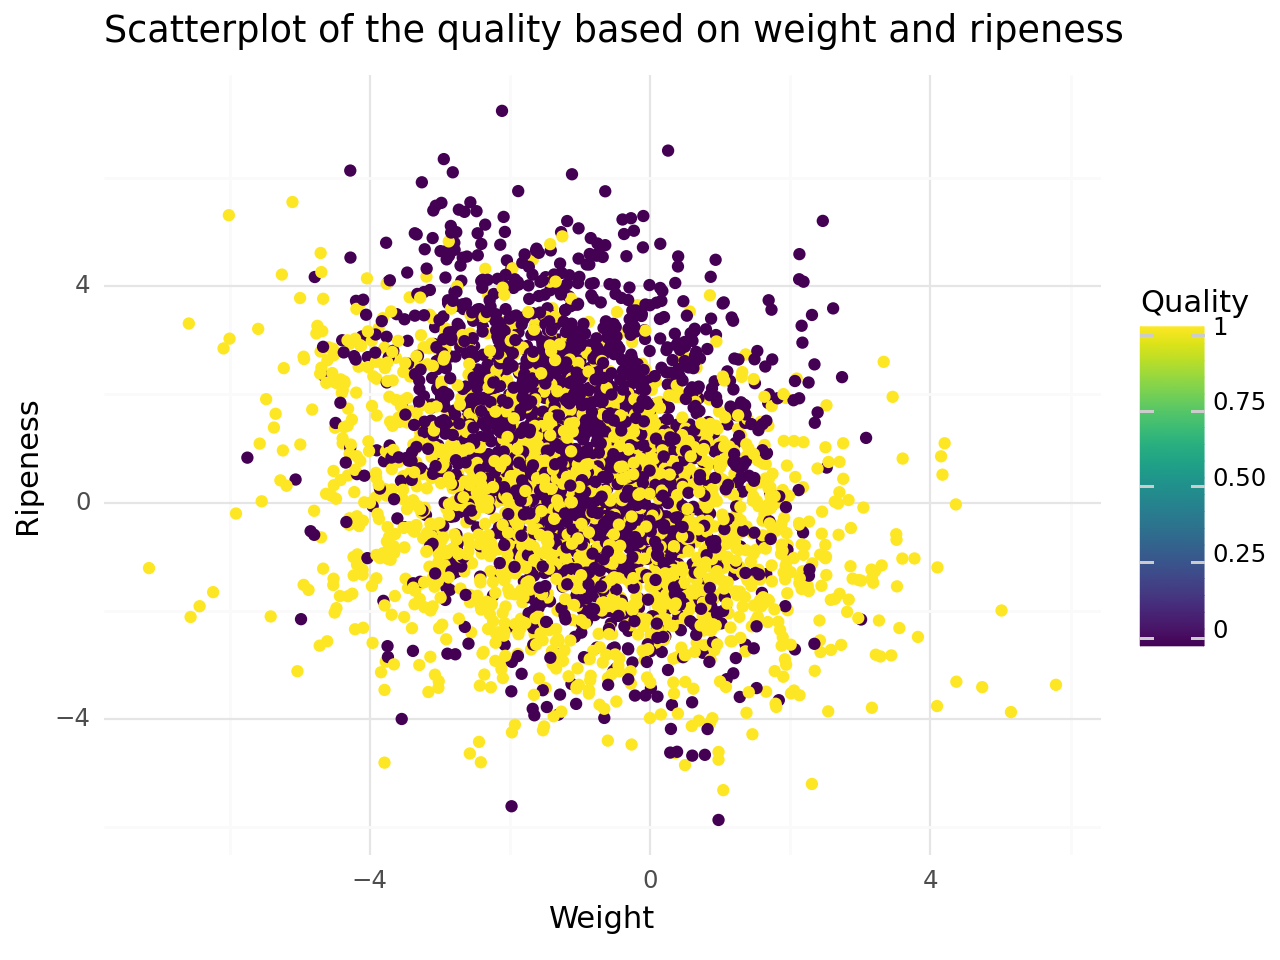

<Figure Size: (640 x 480)>

In [17]:
ggplot(df, aes(x = 'Weight', y = 'Ripeness', color = 'Quality'))+geom_point()+theme_minimal()+ggtitle("Scatterplot of the quality based on weight and ripeness")

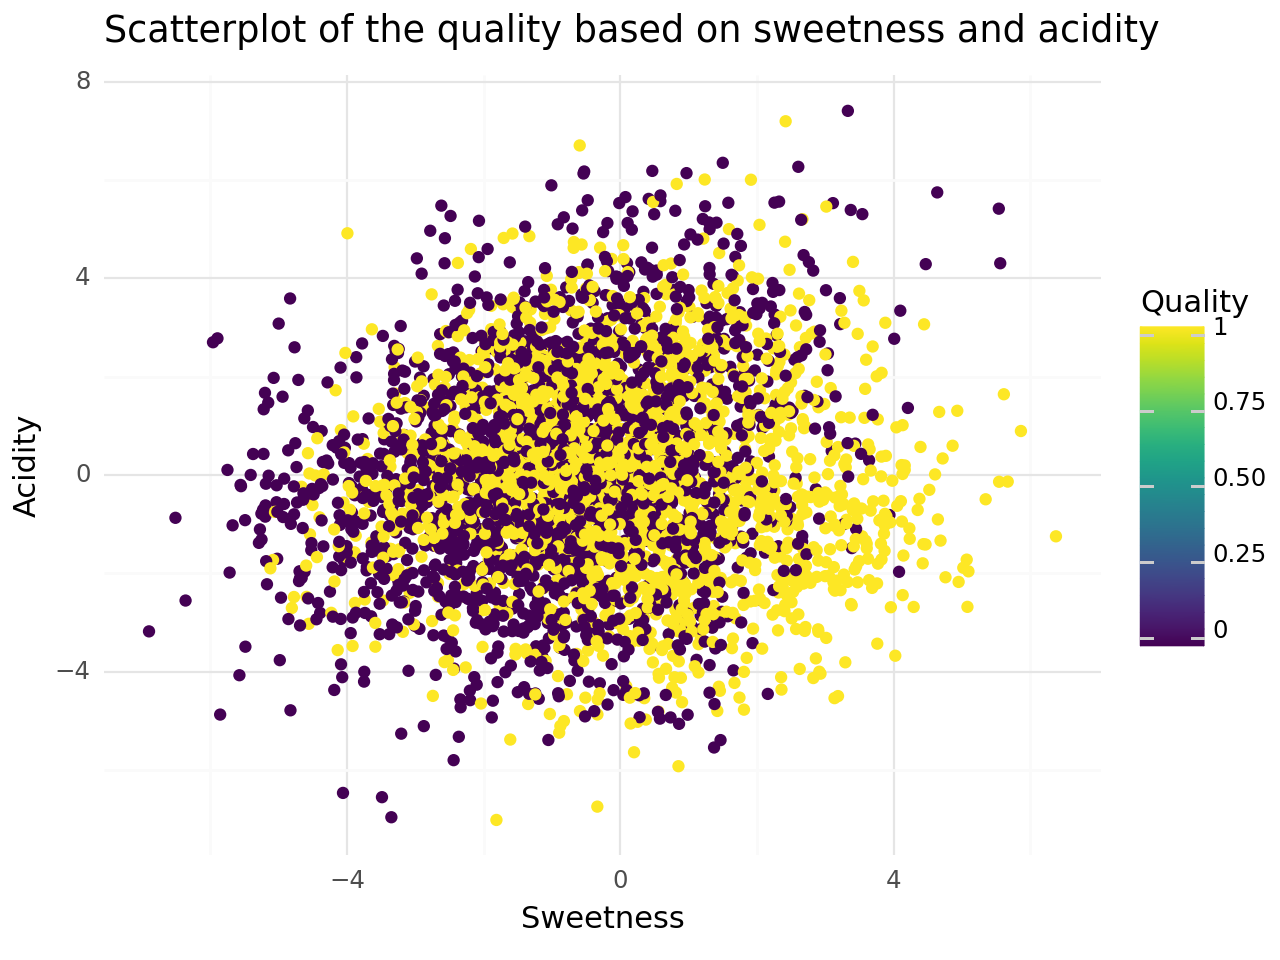

<Figure Size: (640 x 480)>

In [18]:
ggplot(df, aes(x = 'Sweetness', y = 'Acidity', color = 'Quality'))+geom_point()+theme_minimal()+ggtitle("Scatterplot of the quality based on sweetness and acidity")

In [19]:
#Setting predictors and doing a 80/20 TTS
predictors = [c for c in df.columns if c !='Quality']
X=df[predictors]
y=df['Quality']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2)

In [32]:
#build structure of the model
model = kb.Sequential([
    kb.layers.Dense(64, input_shape =[7],activation='relu'), #input
    Dropout(.2),
    kb.layers.Dense(32,kernel_regularizer='l2',activation='relu'),
    kb.layers.Dense(1, activation = "sigmoid") #output
])

#compile model
model.compile(loss="binary_crossentropy", optimizer='Adam',
	metrics=["accuracy"])

#fit the model (same as SKlearn)
model.fit(X_train,y_train, epochs = 50, validation_data=(X_test, y_test),verbose=0)

In [33]:
#Printing out loss and accuracy for train
loss, accuracy = model.evaluate(X_train, y_train)

100/100 [==============================] - 0s 1ms/step - loss: 0.1911 - accuracy: 0.9388


In [34]:
#Printing out loss and accuracy for test
loss, accuracy = model.evaluate(X_test, y_test)

25/25 [==============================] - 0s 2ms/step - loss: 0.2067 - accuracy: 0.9413


In [23]:
#Printing out accuracy of the model as a fraction since it's easier for me to understand
prediction = model.predict(X_test)
y_pred = (prediction > 0.5).astype(int)
y_pred = y_pred.flatten()
correct_predictions = np.sum(y_pred == y_test)
print(f'Number of correct predictions: {correct_predictions} out of {len(y_test)}')

25/25 [==============================] - 0s 1ms/step
Number of correct predictions: 748 out of 800


In [24]:
#Logsistic regression
logistic=LogisticRegression()
#No z-scoring b/c data is already z-scored
pipe=Pipeline([('model',logistic)])
pipe.fit(X_train,y_train)
y_pred_train = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)

y_pred_train_prob = pipe.predict_proba(X_train)[:,1]
y_pred_test_prob = pipe.predict_proba(X_test)[:,1]

#Printing out accuracy and ROC AUC for the logistic regression
print("Train Acc: ", accuracy_score(y_train, y_pred_train))
print("Test Acc: ", accuracy_score(y_test, y_pred_test))
print("Train ROC AUC: ", roc_auc_score(y_train, y_pred_train_prob))
print("Test ROC AUC: ", roc_auc_score(y_test, y_pred_test_prob))

Train Acc:  0.7525
Test Acc:  0.7275
Train ROC AUC:  0.8280772686433064
Test ROC AUC:  0.8083464744311781
